In [ ]:
#networkx para teoría de grafos, matplot para gráficar y random para generar números aleatorios
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp 
from scipy import stats as st
import math 
from scipy.optimize import fsolve

In [ ]:
# Está función muestrea secuencias de números a partir de una distribucion de probabilidad dada
def Degree_Sec_Generator(Probabilidad_Acumulada,longitud_Secuencia):
  """
  (Vector Probabilidada Acumulada, Longitud Secuencia) -------> Secuencia de grado con la distribución del vector
  """
  Degree_Sequence = []
  sum = 0
  for i in range(longitud_Secuencia):
    k = st.uniform.rvs() #muestreo
    for j in range(len(Probabilidad_Acumulada)):
      if k <= Probabilidad_Acumulada[j]: # encuentra la probabilidad acumulada siguiente
        Degree_Sequence.append(j)
        break
  return Degree_Sequence

In [ ]:

#este algoritmo es para muestrear secuencias de grado acorde a una distribución de probabilidad y calcular la secuencia de grado promedio
def Deg_Sec_Prom(Muestreo_seq,Number_nodes,Probability_distribution):
  Deg = []
  for i in range(Muestreo_seq):
    Deg.append([])
    for k in range(10000):
      Degree_Sequence = Degree_Sec_Generator(Probability_distribution,Number_nodes)
      if nx.is_valid_degree_sequence_havel_hakimi(Degree_Sequence) == True:
        if nx.is_connected(nx.havel_hakimi_graph(Degree_Sequence)) == True:
          Degree_Sequence.sort()
          for l in range(len(Degree_Sequence)):
            Deg[i].append(Degree_Sequence[l])
          break

  Degree_sequence_prom = []
  for i in range(Number_nodes - 10):
    sum = 0
    for j in range(Muestreo_seq):
      sum = sum + Deg[j][i]
    Degree_sequence_prom.append(sum/Muestreo_seq)
  return Degree_sequence_prom


In [ ]:
# este programa te calcula los multiplicadores de lagrange dada una secuencia de grado, para el ensamble canonico.
def multp_lagrange_canonico(degre_seq):
  def lagrange_eq(lagrange_multiplicators, degre_seq):
    n = len(lagrange_multiplicators)
    matrix = np.zeros((n,n))
    for i in range(n):
      for j in range(n):
        matrix[i][j] = 1/(math.exp(lagrange_multiplicators[i] + lagrange_multiplicators[j]) + 1)
      matrix[i][i] = 0
    sums = []
    for i in range(n):
      sum = 0
      for j in range(n):
        sum = sum + matrix[i][j]
      sums.append(sum)
    resultado = np.zeros(n)
    for i in range(n):
      resultado[i] = sums[i] - degre_seq[i] 
    return resultado

  x0 = np.zeros(len(degre_seq))
  print(x0)

  multiplicadores = fsolve(lagrange_eq(degre_seq),x0)
  return multiplicadores

In [ ]:
# este algoritmo construye la matriz de adyacencia promedio a partir de los multiplicadores de lagrange para un ensamble canonico
def canonical_matrix(Multiplicadores_Lagrange):
  Adyacencia_promedio = []
  for i in range(len(Multiplicadores_Lagrange)):
    Adyacencia_promedio.append([])
    for j in range(len(Multiplicadores_Lagrange)):
      Adyacencia_promedio[i].append(1/(1 + math.exp((Multiplicadores_Lagrange[i] + Multiplicadores_Lagrange[j]))))
  for i in range(len(Multiplicadores_Lagrange)):
    Adyacencia_promedio[i][i] = 0
  return Adyacencia_promedio

In [ ]:
def cumm_probabilities(n, dx, distribution = st.pareto.cdf):
  dx = m/n
  x = []
  P = []
  for i in range(n):
    equis = 1 + dx*i
    x.append(equis)
    pes = st.pareto.cdf(x[i],1.4) 
    P.append(pes)
  return P, x


In [ ]:
k = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.01, 1.01, 1.015, 1.015, 1.035, 1.055, 1.075, 1.125, 1.175, 1.21, 1.27, 1.325, 1.425, 1.51, 1.625, 1.71, 1.76, 1.835, 1.89, 1.93, 1.98, 2.015, 2.05, 2.075, 2.135, 2.195, 2.245, 2.32, 2.39, 2.49, 2.575, 2.655, 2.725, 2.815, 2.935, 3.02, 3.105, 3.185, 3.255, 3.35, 3.445, 3.585, 3.715, 3.815, 3.915, 4.04, 4.115, 4.25, 4.38, 4.53, 4.675, 4.805, 5.02, 5.22, 5.345, 5.495, 5.675, 5.885, 6.115, 6.3, 6.57, 6.8, 7.1, 7.385, 7.69, 7.99, 8.3, 8.69, 9.025, 9.44, 9.815, 10.275, 10.785, 11.255, 11.88, 12.545, 13.24, 13.88, 14.81, 15.78, 16.82, 18.035, 19.42, 21.245, 23.325, 25.58]
def quitar(secuencia,num):
  for i in range(len(secuencia)):
    if len(secuencia) > num:
      secuencia.pop()
    else:
      break
  return secuencia

# DESDE ACÁ EMPIEZA EL CODIGO


In [ ]:
#N es el número de nodos
max_degree = 95
m = 20
P, x = cumm_probabilities(max_degree,m)
print(P)
prueba=Degree_Sec_Generator(P,100)
prueba.sort()
print(prueba)

[0.0, 0.23469232117203842, 0.3885713687195609, 0.49609499733185625, 0.574832774316937, 0.6346033246536029, 0.6812874218034604, 0.7186039219174132, 0.7490097825671626, 0.774187865458756, 0.7953262130878074, 0.8132854027903664, 0.8287027789195065, 0.842059556521566, 0.85372528096621, 0.8639880354687071, 0.8730754267126974, 0.8811694553537099, 0.8884172419008792, 0.8949388878238493, 0.9008333211051749, 0.9061827007205633, 0.9110557755622188, 0.915510474510296, 0.919595924105386, 0.9233540351988586, 0.9268207616020526, 0.930027106679609, 0.9329999344778154, 0.9357626279813355, 0.93833562685766, 0.9407368694896902, 0.9429821584603458, 0.9450854644123269, 0.9470591799885586, 0.948914333098165, 0.9506607668568225, 0.9523072920791253, 0.9538618170512771, 0.9553314584088889, 0.9567226362300265, 0.9580411558851905, 0.9592922787312383, 0.9604807833707094, 0.9616110189026397, 0.9626869513511737, 0.9637122042627132, 0.964690094302173, 0.9656236625471659, 0.9665157020701431, 0.9673687823083371, 0.96

# este algoritmo muestrea usando el algoritmo de máx entropia y te entrega la matriz de adyacencia_insilico promedio y la secuencia de grado promedio

In [ ]:
#este algoritmo muestrea usando el algoritmo de máx entropia y te entrega la matriz de adyacencia_insilico promedio y la secuencia de grado promedio
%time
muestra = 200
number_of_nodes = 100
connectivity_matrix = np.zeros((muestra, number_of_nodes, number_of_nodes))

Deg_prom_tensor = []  #tensor para al mismo tiempo muestrear las secuencias de grado
Deg = []
for l in range(muestra):
    Deg.append([])
    Number_nodes = number_of_nodes + 10
    for k in range(10000):
      # INICIO DE DEGREE_SEC_GENERATOR
      Degree_Sequence = [] 
      sum = 0
      for i in range(Number_nodes):
        k = st.uniform.rvs() #muestreo
        for j in range(len(P)):
          if k <= P[j]: # encuentra la probabilidad acumulada siguiente
            Degree_Sequence.append(j)
            break
      # FIN DE DEGREE_SEC GENERATOR
      quitar(Degree_Sequence,number_of_nodes)
      if nx.is_valid_degree_sequence_havel_hakimi(Degree_Sequence) == True:
        if nx.is_connected(nx.havel_hakimi_graph(Degree_Sequence)) == True:
          Degree_Sequence.sort()
          Degree_Sequence = quitar(Degree_Sequence,number_of_nodes)
          G = nx.havel_hakimi_graph(Degree_Sequence)
          for n in range(len(Degree_Sequence)):
            Deg[l].append(Degree_Sequence[n])
          break
    nx.double_edge_swap(G,nswap=150,max_tries=150000)
    adjacency = nx.adjacency_matrix(G)
    for i in range(number_of_nodes):
      for j in range(number_of_nodes):
        connectivity_matrix[l][i][j] = adjacency[(i,j)]

Degree_sequence_prom = []
for i in range(Number_nodes - 10):
  sum = 0
  for j in range(muestra):
    sum = sum + Deg[j][i]
  Degree_sequence_prom.append(sum/muestra)

adjacencia_insilico = np.zeros((number_of_nodes,number_of_nodes))

for i in range(number_of_nodes):
  for j in range(number_of_nodes):
    adjprom = 0
    for l in range(muestra):
      adjprom = adjprom + connectivity_matrix[l][i][j]
    adjprom = adjprom/muestra
    adjacencia_insilico[i][j] = adjprom

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


# ACÁ SE CALCULAN LOS MULTIPLICADORES DE LAGRANGE

In [ ]:
def lagrange_eq(lagrange_multiplicators, degre_seq):
  n = len(degre_seq)
  matrix = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      matrix[i][j] = 1/(math.exp(lagrange_multiplicators[i] + lagrange_multiplicators[j]) + 1)
    matrix[i][i] = 0
  equations = []
  for i in range(n):
    sum = 0
    for j in range(n):
      sum = sum + matrix[i][j]
    equations.append(sum)
  resultado = np.zeros(n)
  for i in range(n):
    resultado[i] = equations[i] - degre_seq[i] 
  return resultado

x0 = np.zeros(len(Degree_sequence_prom))
def lagrange(lagrange_multiplicators):
  k = lagrange_eq(lagrange_multiplicators,Degree_sequence_prom)
  return k

multiplicadores = fsolve(lagrange,x0)

print(multiplicadores)

NameError: ignored

In [ ]:

Adyacencia_promedio = canonical_matrix(multiplicadores)

In [ ]:
dx = 1/len(Degree_sequence_prom)
x = []
for i in range(len(Degree_sequence_prom)):
  x.append(dx*i)

sums = []
for i in range(len(Degree_sequence_prom)):
  sums.append([])
  sum = 0
  for j in range(len(Degree_se))



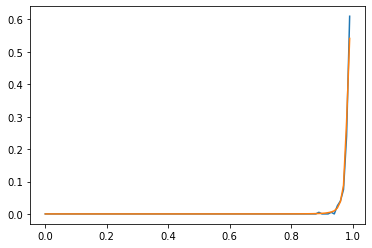

In [ ]:
plt.plot(x,adjacencia_insilico[10])
plt.plot(x,Adyacencia_promedio[10])

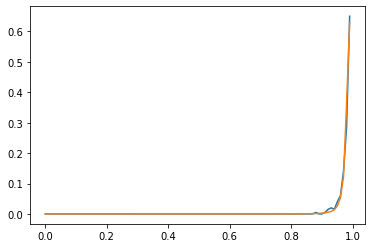

In [ ]:
plt.plot(x,adjacencia_insilico[20])
plt.plot(x,Adyacencia_promedio[20])

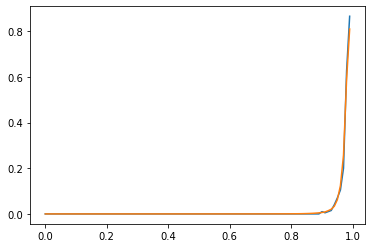

In [ ]:
plt.plot(x,adjacencia_insilico[30])
plt.plot(x,Adyacencia_promedio[30])

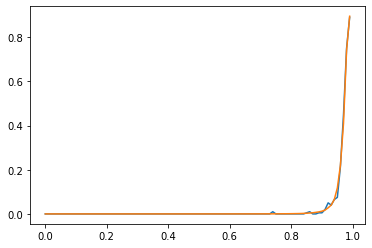

In [ ]:
plt.plot(x,adjacencia_insilico[40])
plt.plot(x,Adyacencia_promedio[40])

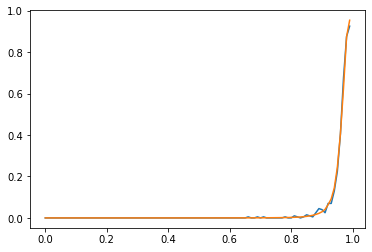

In [ ]:
plt.plot(x,adjacencia_insilico[50])
plt.plot(x,Adyacencia_promedio[50])

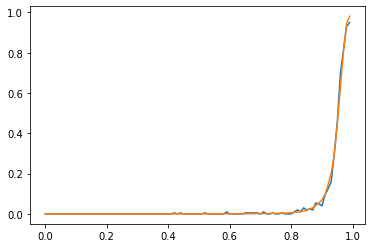

In [ ]:
plt.plot(x,adjacencia_insilico[60])
plt.plot(x,Adyacencia_promedio[60])

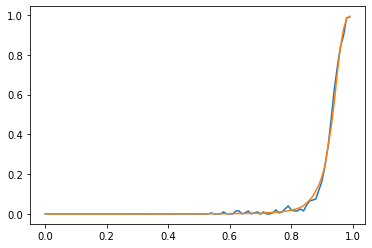

In [ ]:
plt.plot(x,adjacencia_insilico[70])
plt.plot(x,Adyacencia_promedio[70])

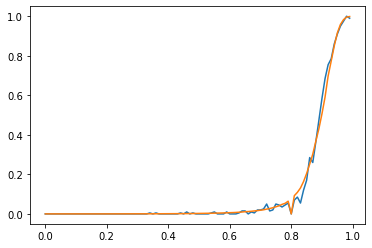

In [ ]:
plt.plot(x,adjacencia_insilico[80])
plt.plot(x,Adyacencia_promedio[80])

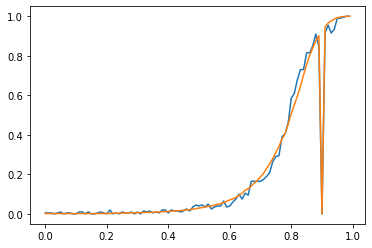

In [ ]:
plt.plot(x,adjacencia_insilico[90])
plt.plot(x,Adyacencia_promedio[90])

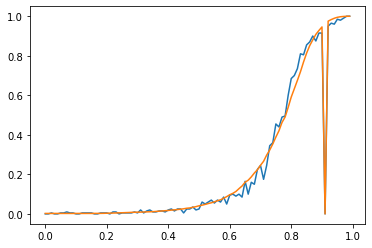

In [ ]:
plt.plot(x,adjacencia_insilico[91])
plt.plot(x,Adyacencia_promedio[91])

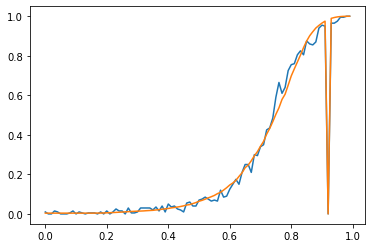

In [ ]:
plt.plot(x,adjacencia_insilico[92])
plt.plot(x,Adyacencia_promedio[92])

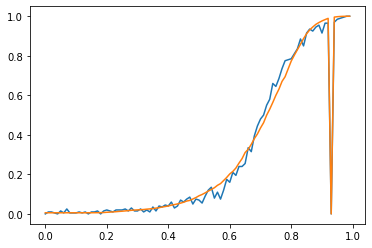

In [ ]:
plt.plot(x,adjacencia_insilico[93])
plt.plot(x,Adyacencia_promedio[93])

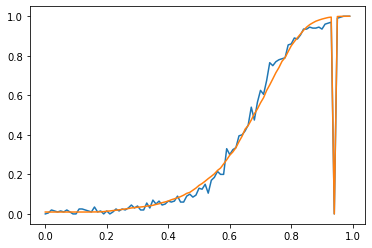

In [ ]:
plt.plot(x,adjacencia_insilico[94])
plt.plot(x,Adyacencia_promedio[94])

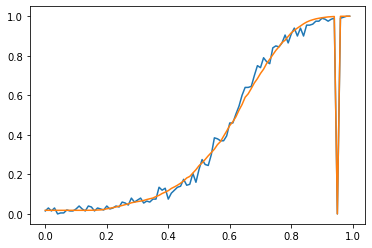

In [ ]:
plt.plot(x,adjacencia_insilico[95])
plt.plot(x,Adyacencia_promedio[95])

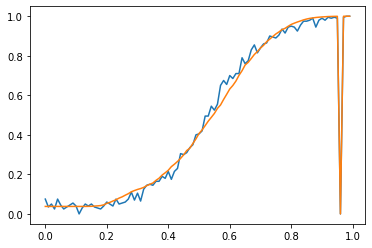

In [ ]:
plt.plot(x,adjacencia_insilico[96])
plt.plot(x,Adyacencia_promedio[96])

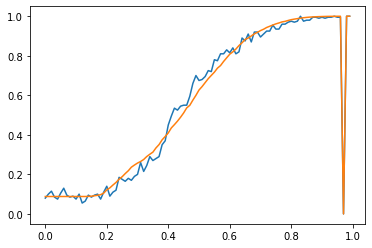

In [ ]:
plt.plot(x,adjacencia_insilico[97])
plt.plot(x,Adyacencia_promedio[97])

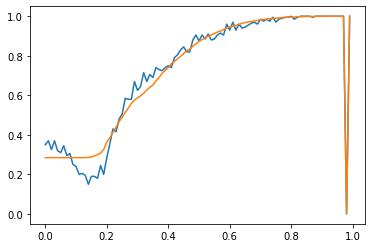

In [ ]:
plt.plot(x,adjacencia_insilico[98])
plt.plot(x,Adyacencia_promedio[98])

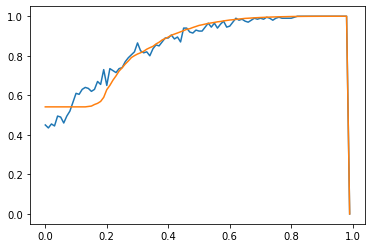

In [ ]:
plt.plot(x,adjacencia_insilico[99])
plt.plot(x,Adyacencia_promedio[99])

In [ ]:
# VECTOR QUE CONTENDRA EL GRADO PROMEDIO
sec_prom_insilico = []
for j in range(len(adjacencia_insilico)):
  num = j
  sum = 0
  for i in range(len(adjacencia_insilico[num])):
    sum = sum + adjacencia_insilico[num][i]
  sec_prom_insilico.append(sum)
print(sec_prom_insilico)
print(Degree_sequence_prom)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.005, 1.01, 1.03, 1.045, 1.07, 1.125, 1.2349999999999999, 1.2999999999999998, 1.3849999999999998, 1.46, 1.5499999999999998, 1.615, 1.6949999999999998, 1.7650000000000001, 1.85, 1.9, 1.945, 1.98, 2.025, 2.09, 2.1399999999999997, 2.185, 2.275, 2.345, 2.445, 2.515, 2.59, 2.695, 2.7649999999999997, 2.8400000000000003, 2.9250000000000003, 3.02, 3.135, 3.195, 3.32, 3.44, 3.58, 3.675, 3.7899999999999996, 3.91, 4.015000000000001, 4.125, 4.27, 4.37, 4.54, 4.705, 4.885, 5.01, 5.175, 5.404999999999999, 5.61, 5.885, 6.0249999999999995, 6.244999999999999, 6.495, 6.7, 6.965000000000001, 7.2, 7.55, 7.835, 8.17, 8.544999999999998, 8.89, 9.355, 9.66, 10.225000000000001, 10.865000000000002, 11.415, 12.014999999999999, 12.705, 13.595, 14.575000000000001, 15.620000000000003, 16.67, 18.02, 19.345, 21.019999999999996, 23.064999999999998, 26.17, 29.019999999999996, 33.1, 38.855, 46.274999999999984, 56.05499999999999, 72.66499999999999, 8

In [ ]:
MUESTRA1000 = [0.020999999999999998, 0.016, 0.020000000000000004, 0.018000000000000002, 0.018000000000000002, 0.017, 0.012, 0.011, 0.015, 0.016, 0.02, 0.013000000000000001, 0.014, 0.016, 0.027000000000000003, 0.012, 0.019000000000000003, 0.018000000000000002, 0.019000000000000003, 0.025, 0.02, 0.023, 0.015, 0.034, 0.029, 0.018, 0.022, 0.022, 0.03, 0.031, 0.027000000000000003, 0.04, 0.038000000000000006, 0.036000000000000004, 0.043000000000000003, 0.042, 0.035, 0.044, 0.048, 0.053000000000000005, 0.054, 0.052, 0.067, 0.066, 0.07300000000000001, 0.068, 0.075, 0.095, 0.09, 0.10700000000000001, 0.11399999999999999, 0.11299999999999999, 0.119, 0.115, 0.14400000000000002, 0.147, 0.15700000000000003, 0.183, 0.2, 0.202, 0.233, 0.254, 0.272, 0.31100000000000005, 0.279, 0.329, 0.356, 0.40700000000000003, 0.458, 0.513, 0.526, 0.616, 0.678, 0.732, 0.8130000000000001, 0.886, 0.99, 1.1300000000000001, 1.252, 1.4089999999999998, 1.596, 1.793, 2.018, 2.2569999999999997, 2.5069999999999997, 2.833, 3.1949999999999994, 3.623, 4.077, 4.6899999999999995, 5.281, 6.051, 6.9239999999999995, 7.793, 8.928, 10.144, 11.639, 13.306000000000001, 15.338000000000005, 17.677]
